In [1]:
# test new classes
from echolab2.instruments import EK80
import matplotlib.pyplot as plt
from glob import glob
import warnings
warnings.filterwarnings('ignore')
from glob import glob
import numpy as np 


# File Creation

In [57]:
file_dir = 'I:/DY202403_FMData/fm/SimSeq/' # set the input file directory
raw_files = sorted(glob(file_dir+'*.raw'))
for file in raw_files:
    ek80 = EK80.EK80() # initiate the EK80 class in pyecholab
    ek80.read_raw(file,frequencies=[38000,70000,120000,200000]) # read in all the raw files in that directory or a subset
    keep = 'Sim'

    active_channels = []
    for id in ek80.channel_ids:
        if not ek80.get_channel_data()[id][0].is_passive():
            active_channels.append(id)
            
    pingtime38 = ek80.get_channel_data()[active_channels[0]][0].ping_time
    pingtime70 = ek80.get_channel_data()[active_channels[1]][0].ping_time
    pingtime120 = ek80.get_channel_data()[active_channels[2]][0].ping_time
    pingtime200 = ek80.get_channel_data()[active_channels[3]][0].ping_time

    if keep == 'Sim':
        b = False
    elif keep == 'Seq':   
        b = True
    else:
        print('Error: keep must be either Sim or Seq')

    del38 = np.where(np.in1d(pingtime38,pingtime70)==b)[0]
    del70 = np.where(np.in1d(pingtime70,pingtime38)==b)[0]
    del120 = np.where(np.in1d(pingtime120,pingtime38)==b)[0]
    del200 = np.where(np.in1d(pingtime200,pingtime38)==b)[0]

    for channel,delIdx in zip(active_channels,[del38,del70,del120,del200]):
        curchannel = ek80.get_channel_data()[channel][0]
        curchannel.delete(index_array=delIdx)
        
    ek80.write_raw('I:/DY202403_FMData/fm/SimSeq/Sim/'+keep, channel_ids=active_channels,overwrite=True)

# File Processing

In [1]:
import svf
from glob import glob
from echolab2.instruments import EK80

%load_ext autoreload
%autoreload 2

In [3]:
file_dir = 'I:/DY202403_FMData/fm/SimSeq/Sim/' # set the input file directory
raw_files = sorted(glob(file_dir+'*.raw'))[-20:]

ek80 = EK80.EK80()
ek80.read_raw(raw_files)
svf_results = svf.svf()
frequencies = [38000,70000,120000,200000]
for freq in frequencies:
    inputs = svf.inputs(ek80,freq,add_cw=False,frequency_resolution=None)
    svf_results.calc_sample_Svf(inputs,exclude_above_line=5,exclude_below_line=60) 
    #svf_results.grid_Svf(inputs,interval_length=10, layer_thickness=2.5)
    #svf_results.get_noise(inputs)
resSim = svf_results

d:\FMCW\svf\gains.py:130: RuntimeWarning: Mean of empty slice
  df.loc[(df.cruise==cruise)&(df.leg==leg)&(df.f==f),'G_int_fm'] = 10*np.log10(np.nanmean(10**(curG/10)))
c:\Users\robert.levine\Anaconda3\lib\site-packages\pyecholab-0.0.2-py3.9.egg\echolab2\instruments\EK80.py:4416: RuntimeWarning: divide by zero encountered in log10
  tvg = 20.0 * np.log10(tvg)
d:\FMCW\svf\gains.py:130: RuntimeWarning: Mean of empty slice
  df.loc[(df.cruise==cruise)&(df.leg==leg)&(df.f==f),'G_int_fm'] = 10*np.log10(np.nanmean(10**(curG/10)))
c:\Users\robert.levine\Anaconda3\lib\site-packages\pyecholab-0.0.2-py3.9.egg\echolab2\instruments\EK80.py:4416: RuntimeWarning: divide by zero encountered in log10
  tvg = 20.0 * np.log10(tvg)
d:\FMCW\svf\gains.py:130: RuntimeWarning: Mean of empty slice
  df.loc[(df.cruise==cruise)&(df.leg==leg)&(df.f==f),'G_int_fm'] = 10*np.log10(np.nanmean(10**(curG/10)))
d:\FMCW\svf\gains.py:130: RuntimeWarning: Mean of empty slice
  df.loc[(df.cruise==cruise)&(df.leg==leg)&(df.f

In [4]:
file_dir = 'I:/DY202403_FMData/fm/SimSeq/Seq/' # set the input file directory
raw_files = sorted(glob(file_dir+'*.raw'))[-20:]

ek80 = EK80.EK80()
ek80.read_raw(raw_files)
svf_results = svf.svf()
frequencies = [38000,70000,120000,200000]
for freq in frequencies:
    inputs = svf.inputs(ek80,freq,add_cw=False,frequency_resolution=None)
    svf_results.calc_sample_Svf(inputs,exclude_above_line=5,exclude_below_line=60) 
    #svf_results.grid_Svf(inputs,interval_length=10, layer_thickness=2.5)
    #svf_results.get_noise(inputs)
resSeq = svf_results

d:\FMCW\svf\gains.py:130: RuntimeWarning: Mean of empty slice
  df.loc[(df.cruise==cruise)&(df.leg==leg)&(df.f==f),'G_int_fm'] = 10*np.log10(np.nanmean(10**(curG/10)))
c:\Users\robert.levine\Anaconda3\lib\site-packages\pyecholab-0.0.2-py3.9.egg\echolab2\instruments\EK80.py:4416: RuntimeWarning: divide by zero encountered in log10
  tvg = 20.0 * np.log10(tvg)
d:\FMCW\svf\gains.py:130: RuntimeWarning: Mean of empty slice
  df.loc[(df.cruise==cruise)&(df.leg==leg)&(df.f==f),'G_int_fm'] = 10*np.log10(np.nanmean(10**(curG/10)))
c:\Users\robert.levine\Anaconda3\lib\site-packages\pyecholab-0.0.2-py3.9.egg\echolab2\instruments\EK80.py:4416: RuntimeWarning: divide by zero encountered in log10
  tvg = 20.0 * np.log10(tvg)
d:\FMCW\svf\gains.py:130: RuntimeWarning: Mean of empty slice
  df.loc[(df.cruise==cruise)&(df.leg==leg)&(df.f==f),'G_int_fm'] = 10*np.log10(np.nanmean(10**(curG/10)))
d:\FMCW\svf\gains.py:130: RuntimeWarning: Mean of empty slice
  df.loc[(df.cruise==cruise)&(df.leg==leg)&(df.f

In [46]:
from matplotlib.pyplot import figure
file_dir = 'I:/DY202403_FMData/fm/SimSeq/Sim/' 
raw_files = sorted(glob(file_dir+'Sim*.raw'))

ek80 = EK80.EK80()
ek80.read_raw(raw_files[-20])
d = ek80.get_channel_data(frequencies=38000)


In [47]:
dsv = d[38000][0].get_Sv()

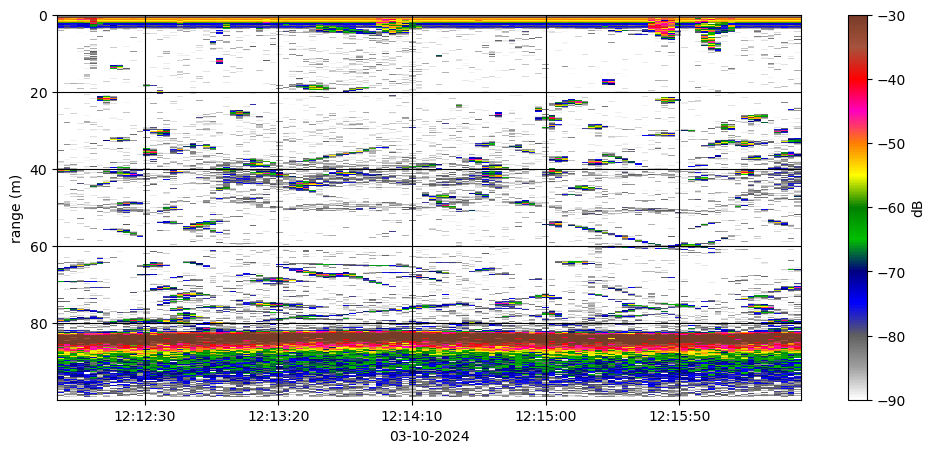

In [48]:
from echolab2.plotting.matplotlib import echogram
fig_1 = figure(figsize=(12,5))
eg = echogram.Echogram(fig_1, dsv,threshold=[-90,-30])
eg.add_colorbar(fig_1)
#plt.ylim(20,30)

(20.0, 30.0)

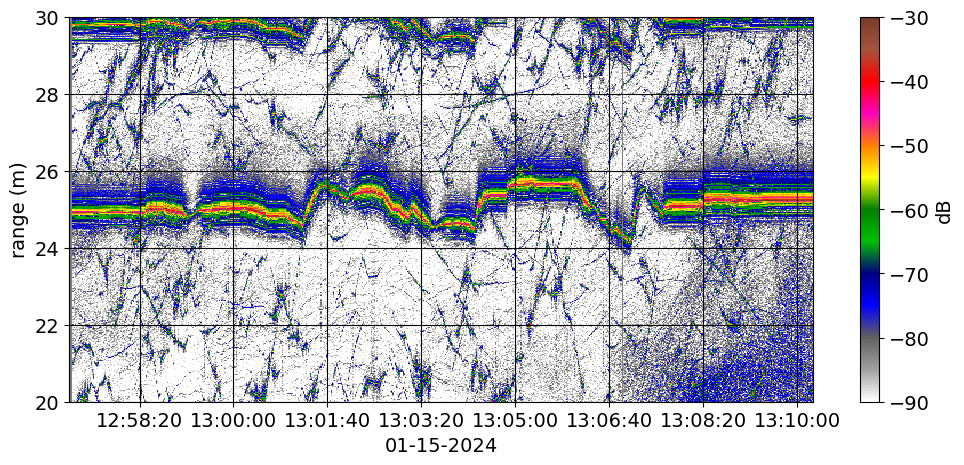

In [849]:
from echolab2.plotting.matplotlib import echogram
fig_1 = figure(figsize=(12,5))
eg = echogram.Echogram(fig_1, dsv,threshold=[-90,-30])
eg.add_colorbar(fig_1)
plt.ylim(20,30)

In [9]:
def nearest_ind(items, pivot):
    time_diff = np.abs([date - pivot for date in items])
    return time_diff.argmin(0)

Text(0.5, 0.98, 'Simulataneous - Sequential')

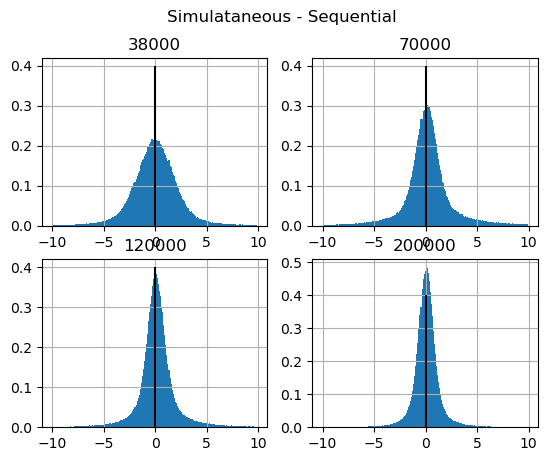

In [44]:
import numpy as np
import matplotlib.pyplot as plt
# Sample by sample, ping by ping
allDiffs = {}
for f in [38000,70000,120000,200000]:
    diffs = np.array([])
    for pseq in range(len(resSeq.ping_time[f])):
        psim = nearest_ind(resSim.ping_time[f],resSeq.ping_time[f][pseq])
        diffs = np.append(diffs,svf.pMean(resSim.Sv_sample[f][psim],axis=1)-svf.pMean(resSeq.Sv_sample[f][pseq],axis=1))
    allDiffs[f] = diffs

ct=1
for f in [38000,70000,120000,200000]:
    plt.subplot(2,2,ct)
    plt.hist(allDiffs[f],bins=np.arange(-10,10,.1),density=True);
    plt.vlines(0,0,.4,'k')
    plt.title(f)
    plt.grid()
    ct+=1

plt.suptitle('Simulataneous - Sequential')

Text(0.5, 0.98, 'Simulataneous - Sequential')

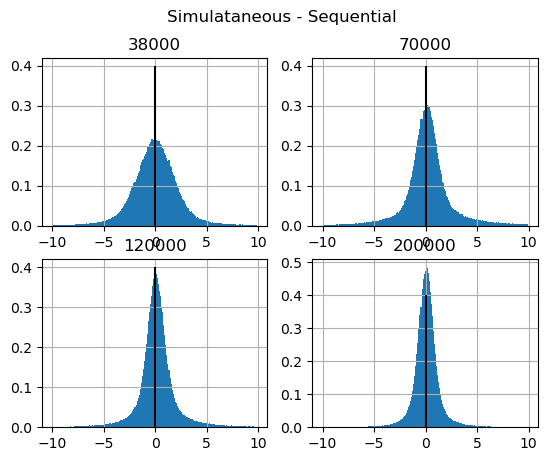

In [49]:
# Sample by sample, ping by ping
allDiffs = {}
for f in [38000,70000,120000,200000]:
    diffs = np.array([])
    for pseq in range(len(resSeq.ping_time[f])):
        psim = nearest_ind(resSim.ping_time[f],resSeq.ping_time[f][pseq])
        diffs = np.append(diffs,svf.pMean(resSim.Sv_sample[f][psim],axis=1)-svf.pMean(resSeq.Sv_sample[f][pseq],axis=1))
    allDiffs[f] = diffs

ct=1
for f in [38000,70000,120000,200000]:
    plt.subplot(2,2,ct)
    plt.hist(allDiffs[f],bins=np.arange(-10,10,.1),density=True);
    plt.vlines(0,0,.4,'k')
    plt.title(f)
    plt.grid()
    ct+=1

plt.suptitle('Simulataneous - Sequential')

In [29]:
r = 5
redges = np.arange(10,75,r)

full_sim = {}
full_seq = {}

for f in [38000,70000,120000,200000]:
    grid_sim = []
    grid_seq = []
    l = np.arange(len(resSeq.ping_time[f]))
    n = 50
    x = [l[i:i + n] for i in range(0, len(l), n)]  
    for pseq in x:
        #self.calc_noise(iter_interval)
        hold_layer_sim = []
        hold_layer_seq = []
        psim = nearest_ind(resSim.ping_time[f],resSeq.ping_time[f][pseq])
        for rsub in redges:
            rIdx = np.where((resSeq.svf_range[f]>=rsub)&(resSeq.svf_range[f]<rsub+r))[0]
            #hold_layer_sim.append(10**(svf.pMean(svf.pMean(svf.pMean(resSim.Sv_sample[f][psim])[rIdx]))/10)*r*4*np.pi*(1852**2))
            #hold_layer_seq.append(10**(svf.pMean(svf.pMean(svf.pMean(resSeq.Sv_sample[f][pseq])[rIdx]))/10)*r*4*np.pi*(1852**2))
            hold_layer_sim.append((svf.pMean(svf.pMean(svf.pMean(resSim.Sv_sample[f][psim])[rIdx]))))
            hold_layer_seq.append((svf.pMean(svf.pMean(svf.pMean(resSeq.Sv_sample[f][pseq])[rIdx]))))
        grid_sim.append(np.array(hold_layer_sim))
        grid_seq.append(np.array(hold_layer_seq))
    full_sim[f] = np.array(grid_sim)
    full_seq[f] = np.array(grid_seq)

38000 0.9812157530885665 0.9727985706659634 0.9896329355111695
70000 1.000032537345502 0.9873998465548027 1.0126652281362012
120000 1.006837182594622 0.985396114823385 1.0282782503658592
200000 1.0124075558514154 0.9985903861660742 1.0262247255367565


Text(0, 0.5, 's$_{A,sim}$/s$_{A,seq}$')

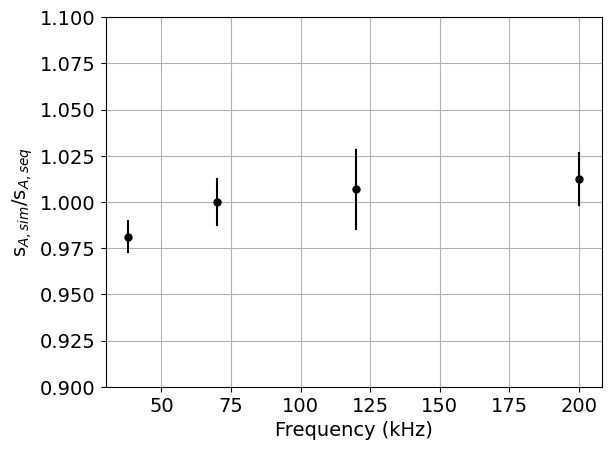

In [1399]:
for f in [38000,70000,120000,200000]:
    cursimsa =  10**(full_sim[f]/10)*r*4*np.pi*(1852**2)
    curseqsa = 10**(full_seq[f]/10)*r*4*np.pi*(1852**2)
    mean = 10**(np.nanmean(np.log10(cursimsa/curseqsa)))
    std = np.nanstd(cursimsa/curseqsa)
    se = std/np.sqrt(len(np.ravel(full_seq[f])))
    print(f,mean,mean-(se*1.96),mean+(se*1.96))
    plt.plot(f/1000,mean,'.k',markersize=10)
    plt.plot([f/1000,f/1000],[mean-(se*1.96),mean+(se*1.96)],'k')
plt.grid()
plt.ylim(.9,1.1)
plt.xlabel('Frequency (kHz)')
plt.ylabel('s$_{A,sim}$/s$_{A,seq}$')

In [23]:
fsim = np.where(full_sim[f] >-40,np.nan,full_sim[f])
fseq = np.where(full_seq[f] >-40,np.nan,full_seq[f])

-42.9295986961479

38000 0.986167138518474 0.9489950672733027 1.0233392097636453 2176.942979216687
70000 0.9878453200272532 0.9328360746182953 1.0428545654362111 1835.3592656359401
120000 1.0139511354660995 0.9859808173337051 1.041921453598494 2111.27903482595
200000 1.022911435704981 0.97121871872032 1.0746041526896424 2275.4279645959527


Text(0, 0.5, 's$_{A,sim}$/s$_{A,seq}$')

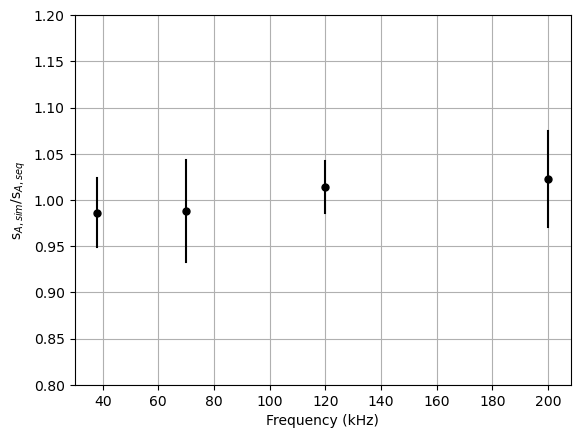

In [43]:
for f in [38000,70000,120000,200000]:
    fsim = np.where((full_sim[f] <-80)|(full_sim[f] >-40),np.nan,full_sim[f])
    fseq = np.where((full_seq[f] <-80)|(full_seq[f] >-40),np.nan,full_seq[f])
    cursimsa =  10**(fsim/10)*r*4*np.pi*(1852**2)
    curseqsa = 10**(fseq/10)*r*4*np.pi*(1852**2)
    
    mean = 10**(np.nanmean(np.log10(cursimsa/curseqsa)))
    std = np.nanstd(cursimsa/curseqsa)
    se = std/np.sqrt(len(np.ravel(full_seq[f])))
    print(f,mean,mean-(se*1.96),mean+(se*1.96),np.nanmax(cursimsa))
    plt.plot(f/1000,mean,'.k',markersize=10)
    plt.plot([f/1000,f/1000],[mean-(se*1.96),mean+(se*1.96)],'k')
plt.grid()
plt.ylim(.8,1.2)
plt.xlabel('Frequency (kHz)')
plt.ylabel('s$_{A,sim}$/s$_{A,seq}$')

38000 0.9901413030950806 0.9064974689175085 1.0737851372726528
70000 0.9948340869559535 0.8542746587458773 1.13539351516603
120000 1.0191638467913435 0.9863779909479391 1.051949702634748
200000 1.030464237211624 0.8578391446210295 1.2030893298022185


Text(0, 0.5, 's$_{A,sim}$/s$_{A,seq}$')

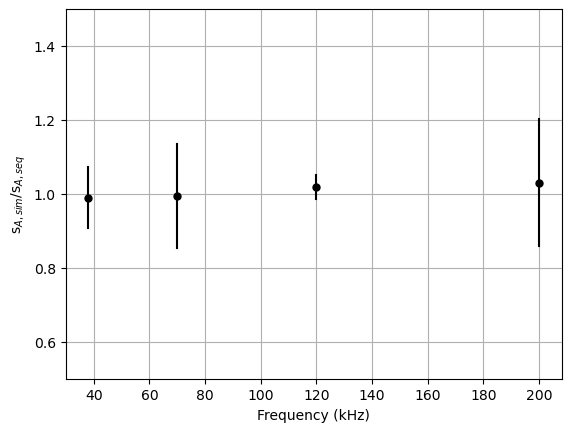

In [45]:
for f in [38000,70000,120000,200000]:
    cursimsa =  10**(full_sim[f]/10)*r*4*np.pi*(1852**2)
    curseqsa = 10**(full_seq[f]/10)*r*4*np.pi*(1852**2)
    mean = 10**(np.nanmean(np.log10(cursimsa/curseqsa)))
    std = np.nanstd(cursimsa/curseqsa)
    se = std/np.sqrt(len(np.ravel(full_seq[f])))
    print(f,mean,mean-(se*1.96),mean+(se*1.96))
    plt.plot(f/1000,mean,'.k',markersize=10)
    plt.plot([f/1000,f/1000],[mean-(se*1.96),mean+(se*1.96)],'k')
plt.grid()
plt.ylim(0.5,1.5)
plt.xlabel('Frequency (kHz)')
plt.ylabel('s$_{A,sim}$/s$_{A,seq}$')

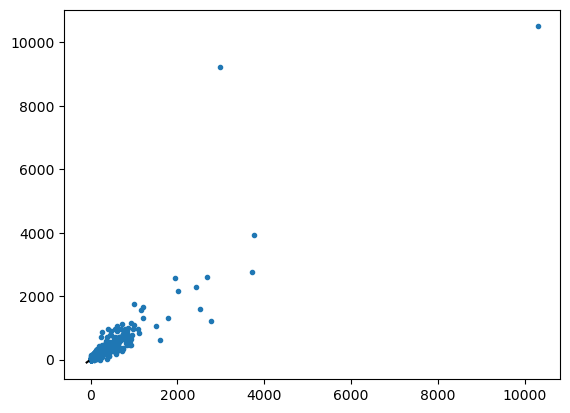

In [28]:
f = 38000
sim = np.ravel(cursimsa)
seq = np.ravel(curseqsa)
plt.plot(sim,seq,'.')
plt.plot([-90,-50],[-90,-50],'k')

Ttest_relResult(statistic=1.0060716479356222, pvalue=0.31474484888533283)
Ttest_relResult(statistic=-8.296335777495253, pvalue=6.72521297496086e-16)
Ttest_relResult(statistic=2.410012950009313, pvalue=0.016224915022872013)
Ttest_relResult(statistic=1.2973396141453777, pvalue=0.194968334639458)


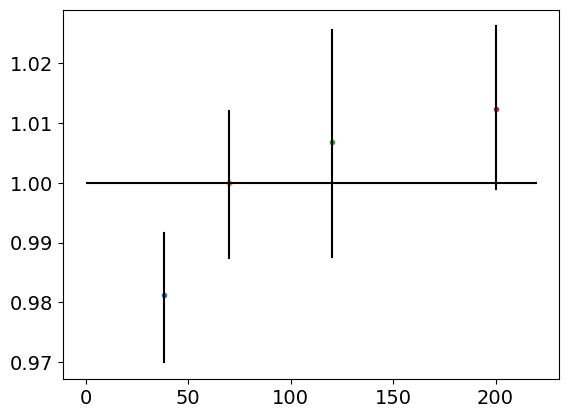

In [1356]:
for f in [38000,70000,120000,200000]:
    sim = np.ravel(full_sim[f])
    seq = np.ravel(full_seq[f])
    print(stats.ttest_rel(sim[~np.isnan(sim)&~np.isnan(seq)],seq[~np.isnan(sim)&~np.isnan(seq)]))

    boot = []
    for i in range(5000):
        randIdx = np.random.randint(0,high=len(sim),size=len(sim),dtype=np.int64)
        boot.append(10**(np.nanmean(np.log10(sim[randIdx]/seq[randIdx]))))
    plt.plot(f/1000,10**(np.nanmean(np.log10(boot))),'.')
    plt.plot([f/1000,f/1000],[np.percentile(boot,2.5),np.percentile(boot,97.5)],'k')


plt.hlines(1,0,220,'k')


In [1337]:
10**(np.nanmean(np.log10(boot)))

1.0125401529770455

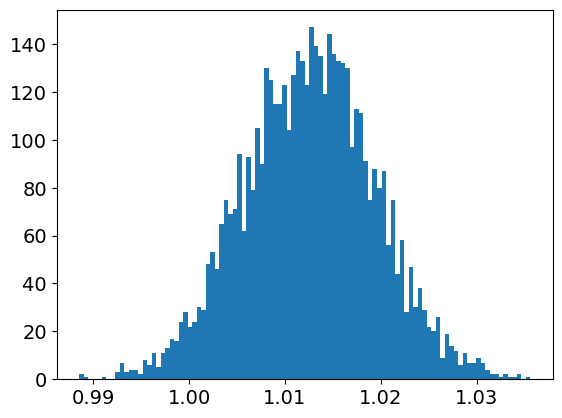

In [1336]:
plt.hist(boot,bins=100);

In [1316]:
for f in [38000,70000,120000,200000]:
    full_sim

In [982]:
redgesList = [[22.5,27.5],[27.5,32.5]]
gridBig = []
for redges in redgesList:
    allDiffs = {}
    grid = {}
    for f in [38000,70000,120000,200000]:
        l = np.arange(len(resSeq.ping_time[f]))
        n = 10
        x = [l[i:i + n] for i in range(0, len(l), n)]  
        diffs = np.array([])
        intSim = np.array([])
        intSeq = np.array([])
        for pseq in x:
            psim = nearest_ind(resSim.ping_time[f],resSeq.ping_time[f][pseq])
            for rsub in range(len(redges)-1):
                rIdx = np.where((resSeq.svf_range[f]>=redges[rsub])&(resSeq.svf_range[f]<redges[rsub+1]))[0]
                diffs = np.append(diffs,svf.pMean(svf.pMean(svf.pMean(resSim.Sv_sample[f][psim])[rIdx]))-svf.pMean(svf.pMean(svf.pMean(resSeq.Sv_sample[f][pseq])[rIdx])))
                intSim = np.append(intSim,svf.pMean(svf.pMean(svf.pMean(resSim.Sv_sample[f][psim])[rIdx])))
                intSeq = np.append(intSeq,svf.pMean(svf.pMean(svf.pMean(resSeq.Sv_sample[f][pseq])[rIdx])))
        allDiffs[f] = diffs
        grid[f] = [intSim,intSeq]
    gridBig.append(grid)

In [ ]:
r = 5
redges = np.arange(7.5,65,r)

allDiffs = {}
grid = {}

for f in [38000,70000,120000,200000]:
    l = np.arange(len(resSeq.ping_time[f]))
    n = 10
    x = [l[i:i + n] for i in range(0, len(l), n)]  
    diffs = np.array([])
    intSim = np.array([])
    intSeq = np.array([])
    for pseq in x:
        psim = nearest_ind(resSim.ping_time[f],resSeq.ping_time[f][pseq])
        for rsub in redges:
            rIdx = np.where((resSeq.svf_range[f]>=rsub)&(resSeq.svf_range[f]<rsub+r))[0]
            intSim = np.append(intSim,10**(svf.pMean(svf.pMean(svf.pMean(resSim.Sv_sample[f][psim])[rIdx]))/10)*5*4*np.pi*(1852**2))
            intSeq = np.append(intSeq,10**(svf.pMean(svf.pMean(svf.pMean(resSeq.Sv_sample[f][pseq])[rIdx]))/10)*5*4*np.pi*(1852**2))
    grid[f] = [intSim,intSeq]

In [ ]:
r = 5
redges = np.arange(7.5,65,r)

allDiffs = {}
grid = {}

for f in [38000,70000,120000,200000]:
    l = np.arange(len(resSeq.ping_time[f]))
    n = 10
    x = [l[i:i + n] for i in range(0, len(l), n)]  
    diffs = np.array([])
    intSim = np.array([])
    intSeq = np.array([])
    for pseq in x:
        psim = nearest_ind(resSim.ping_time[f],resSeq.ping_time[f][pseq])
        for rsub in redges:
            rIdx = np.where((resSeq.svf_range[f]>=rsub)&(resSeq.svf_range[f]<rsub+r))[0]
            diffs = np.append(diffs,svf.pMean(svf.pMean(svf.pMean(resSim.Sv_sample[f][psim])[rIdx]))-svf.pMean(svf.pMean(svf.pMean(resSeq.Sv_sample[f][pseq])[rIdx])))
            intSim = np.append(intSim,svf.pMean(svf.pMean(svf.pMean(resSim.Sv_sample[f][psim])[rIdx])))
            intSeq = np.append(intSeq,svf.pMean(svf.pMean(svf.pMean(resSeq.Sv_sample[f][pseq])[rIdx])))
    allDiffs[f] = diffs
    grid[f] = [intSim,intSeq]

In [ ]:
r = 5
redges = np.arange(7.5,60,r)

gridSim = []
gridSeq = []

for f in [38000]:#,70000,120000,200000]:
    l = np.arange(len(resSeq.ping_time[f]))
    n = 10
    x = [l[i:i + n] for i in range(0, len(l), n)]  
    intSim = []
    intSeq = []
    for pseq in x:
        pgSim = []
        pgSeq = []
        psim = nearest_ind(resSim.ping_time[f],resSeq.ping_time[f][pseq])
        for rsub in redges:
            rIdx = np.where((resSeq.svf_range[f]>=rsub)&(resSeq.svf_range[f]<rsub+r))[0]
            intSim.append(svf.pMean(svf.pMean(resSim.Sv_sample[f][psim])[rIdx]))
            intSeq = np.append(intSeq,svf.pMean(svf.pMean(resSeq.Sv_sample[f][pseq])[rIdx]))
        pgSim.append(np.array(intSim))
        pgSeq.append(np.array(intSeq))
    gridSim.append(np.array(pgSim))
    gridSeq.append(np.array(pgSeq))

In [991]:
r = 5
redges = np.arange(27.5,60,r)

full_sim = {}
full_seq = {}

for f in [38000,70000,120000,200000]:
    grid_sim = []
    grid_seq = []
    l = np.arange(len(resSeq.ping_time[f]))
    n = 10
    x = [l[i:i + n] for i in range(0, len(l), n)]  
    for pseq in x:
        #self.calc_noise(iter_interval)
        hold_layer_sim = []
        hold_layer_seq = []
        psim = nearest_ind(resSim.ping_time[f],resSeq.ping_time[f][pseq])
        for rsub in redges:
            rIdx = np.where((resSeq.svf_range[f]>=rsub)&(resSeq.svf_range[f]<rsub+r))[0]
            hold_layer_sim.append(svf.pMean(svf.pMean(resSim.Sv_sample[f][psim])[rIdx]))
            hold_layer_seq.append(svf.pMean(svf.pMean(resSeq.Sv_sample[f][pseq])[rIdx]))
        grid_sim.append(np.array(hold_layer_sim))
        grid_seq.append(np.array(hold_layer_seq))
    full_sim[f] = np.array(grid_sim)
    full_seq[f] = np.array(grid_seq)

In [ ]:
for f in [38000,70000,120000,200000]:
    freq = []
    for fr in range(len(resSeq.frequency[f])):
        ratios = []
        sim = []
        seq = []
        for ping in range(len(full_sim[f])):
            for layer in range(len(full_sim[f][ping])):
                sim.append(full_sim[f][ping][layer][fr])
                seq.append(full_seq[f][ping][layer][fr])

In [1156]:
np.nanstd(ratios)/np.sqrt(len(ratios))

0.01819008476319825

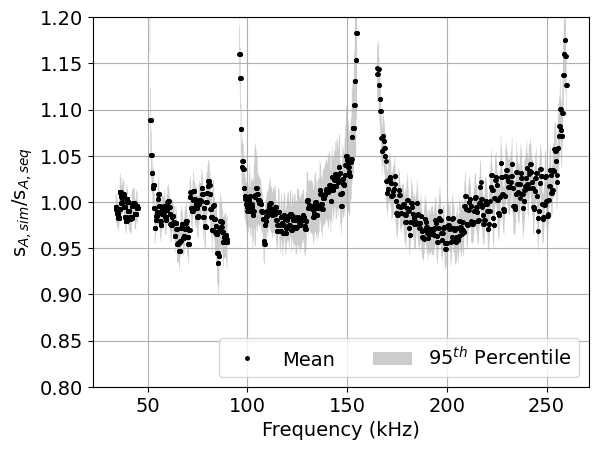

In [1158]:
for f in [38000,70000,120000,200000]:
    freq = []
    freq_ratio = []
    for fr in range(len(resSeq.frequency[f])):
        ratios = []
        for ping in range(len(full_sim[f])):
            for layer in range(len(full_sim[f][ping])):
                ratios.append((10**(full_sim[f][ping][layer][fr]/10)*5*4*np.pi*(1852**2))/(10**(full_seq[f][ping][layer][fr]/10)*5*4*np.pi*(1852**2)))
        freq.append(resSeq.frequency[f][fr])
        freq_ratio.append(np.array(ratios))

    meanRat,lowRat,highRat = [],[],[]
    for f in range(len(freq)):
        meanRat.append(10**np.nanmean(np.log10(freq_ratio[f])))
        lowRat.append(10**np.nanmean(np.log10(freq_ratio[f]))-(np.nanstd(freq_ratio[f])/np.sqrt(len(freq_ratio[f]))*1.96))
        highRat.append(10**np.nanmean(np.log10(freq_ratio[f]))+(np.nanstd(freq_ratio[f])/np.sqrt(len(freq_ratio[f]))*1.96))
        #lowRat.append(np.nanpercentile(freq_ratio[f],2.5))
        #highRat.append(np.nanpercentile(freq_ratio[f],97.5))

    plt.plot(np.array(freq)/1000,meanRat,'.k',markersize=5)
    plt.fill_between(np.array(freq)/1000,lowRat,highRat,alpha=.2, color='k',edgecolor=None)
plt.ylim(.8,1.2)
plt.grid()
plt.xlabel('Frequency (kHz)')
plt.ylabel('s$_{A,sim}$/s$_{A,seq}$')
plt.legend(['Mean','95$^{th}$ Percentile'],ncol=2,loc='lower right')

In [1205]:
psim

array([696, 697, 698, 698, 698], dtype=int64)

In [1234]:
10**(freq_vals[f][0][k]/10)*5*4*np.pi*(1852**2)

5.4827217580182905

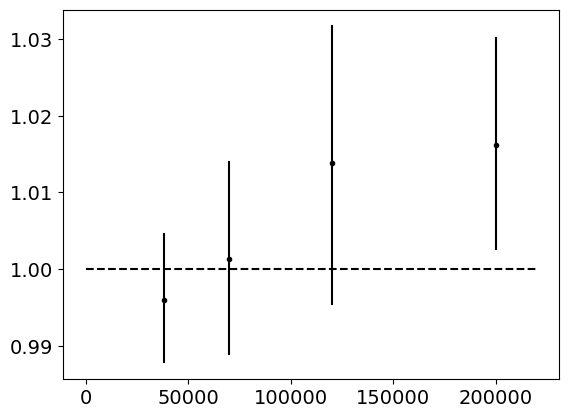

In [1275]:
freq_ratio,freq_sA = {},{}
for f in [38000,70000,120000,200000]:
    ratios = []
    allSim = []
    allSeq = []
    for ping in range(len(full_sim[f])):
        for layer in range(len(full_sim[f][ping])):
            ratios.append((10**(svf.pMean(full_sim[f][ping][layer])/10)*5*4*np.pi*(1852**2))/(10**(svf.pMean(full_seq[f][ping][layer])/10)*5*4*np.pi*(1852**2)))
            allSim.append(svf.pMean(full_sim[f][ping][layer][:]))
            allSeq.append(svf.pMean(full_seq[f][ping][layer][:]))
    freq_ratio[f] = ratios
    freq_sA[f] = [10**(np.array(allSim)/10)*5*4*np.pi*(1852**2),10**(np.array(allSeq)/10)*5*4*np.pi*(1852**2)]


for f in [38000,70000,120000,200000]:
    boot = []
    for i in range(5000):
        randIdx = np.random.randint(0,high=len(freq_sA[f][0]),size=len(freq_sA[f][0]),dtype=np.int64)
        boot.append(10**np.nanmean(np.log10(np.array([freq_sA[f][0][k] for k in randIdx])/np.array([freq_sA[f][1][k] for k in randIdx]))))
    plt.plot(f,10**(np.nanmean(np.log10(boot))),'.k')
    plt.plot([f,f],[np.percentile(boot,2.5),np.percentile(boot,97.5)],'k')
plt.hlines(1,0,220000,linestyle='--',color='k')


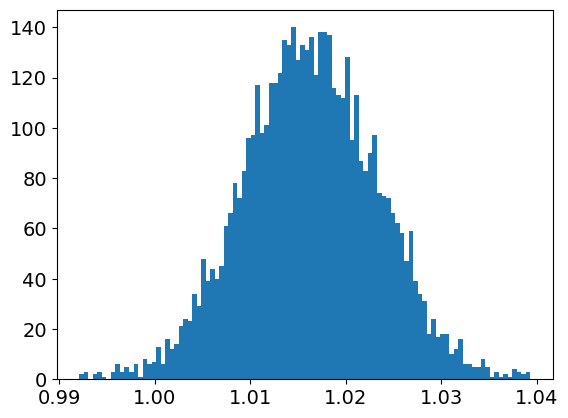

In [1276]:
plt.hist(boot,bins=100);

i:\202400_SimSeq\svf.py:415: RuntimeWarning: Mean of empty slice
  return 10*np.log10(np.nanmean(10**(data/10),axis=axis))


Text(0, 0.5, 's$_{A,sim}$/s$_{A,seq}$')

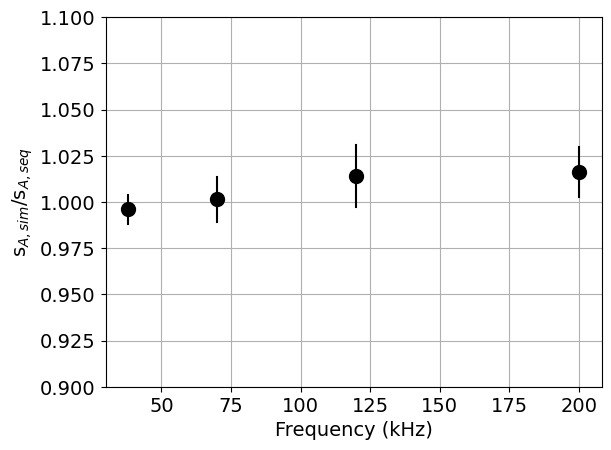

In [1176]:
freq_ratio,freq_vals = {},{}
for f in [38000,70000,120000,200000]:
    ratios = []
    allSim = []
    allSeq = []
    for ping in range(len(full_sim[f])):
        for layer in range(len(full_sim[f][ping])):
            ratios.append((10**(svf.pMean(full_sim[f][ping][layer])/10)*5*4*np.pi*(1852**2))/(10**(svf.pMean(full_seq[f][ping][layer])/10)*5*4*np.pi*(1852**2)))
            allSim.append(svf.pMean(full_sim[f][ping][layer]))
            allSeq.append(svf.pMean(full_seq[f][ping][layer]))
    freq_ratio[f] = ratios
    freq_vals[f] = [allSim,allSeq]

            
    plt.plot(f/1000,10**(np.nanmean(np.log10(np.array(ratios)))),'ok',markersize=10)
    plt.plot([f/1000,f/1000],[10**(np.nanmean(np.log10(np.array(ratios))))-(np.nanstd(ratios)/np.sqrt(len(ratios))*1.96),10**(np.nanmean(np.log10(np.array(ratios))))+(np.nanstd(ratios)/np.sqrt(len(ratios))*1.96)],'-k')


plt.ylim(.9,1.1)
plt.grid()
plt.xlabel('Frequency (kHz)')
plt.ylabel('s$_{A,sim}$/s$_{A,seq}$')


1.0529902504680657

Text(0.5, 0, 'Frequency (kHz)')

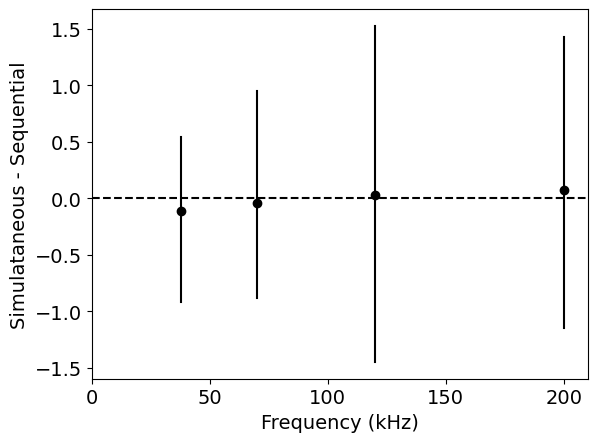

In [427]:
# Cheating, just use the percentiles
for f in [38000,70000,120000,200000]:
    plt.plot(f/1000, np.nanmean(allDiffs[f]),'o',color='k')
    plt.plot([f/1000,f/1000], [np.nanpercentile(allDiffs[f],5),np.nanpercentile(allDiffs[f],95)],color='k')
plt.hlines(0,0,210,'k', linestyle='--')
plt.xlim(0,210)
plt.ylabel('Simulataneous - Sequential')
plt.xlabel('Frequency (kHz)')

In [387]:
import gains
gain = gains.gains()


i:\202400_SimSeq\gains.py:130: RuntimeWarning: Mean of empty slice
  df.loc[(df.cruise==cruise)&(df.leg==leg)&(df.f==f),'G_int_fm'] = 10*np.log10(np.nanmean(10**(curG/10)))


In [425]:
import pandas as pd
calRef = {'mean_Sv_fave':'G_fave_fm','mean_Sv_int':'G_int_fm','mean_Sv_fc':'G_fc_fm','mean_Sv_f':'G_fave_fm','mean_Sv_f_bw':'G_fave_fm'}

f_s, cal_s, rat_s,rat_g,rat_sa = [], [], [],[],[]
for i in range(5000):
    for f in [38000,70000,120000,200000]:

        Gmean = 10*np.log10(np.nanmean(10**(gain.df[(gain.df.f==f/1000)]['G_fave_fm']/10))) # get the mean CW cal

        r = np.random.randint(0, len(gain.df[(gain.df.f==f/1000)]['G_fave_fm'])) # randomly draw a number between 1 and the number of cw cals we have
        rSeq = gain.df[(gain.df.f==f/1000)]['G_fave_fm'].iloc[r] # get the random cal to use for the sequential 

        r = np.random.randint(0, len(gain.df[(gain.df.f==f/1000)]['G_fave_fm'])) # randomly draw a number between 1 and the number of fm cals we have
        rSim = gain.df[(gain.df.f==f/1000)]['G_fave_fm'].iloc[r] # get the random cal to use for the simultaneous

        ratSeq = (10**(2*(rSeq-Gmean)/10)) # calculate the ratio of the sequential to the mean
        ratSim = (10**(2*(rSim-Gmean)/10)) # calculate the ratio of the simultaneous to the mean
        ratG = ratSim/ratSeq # Get our 'gain' ratio
        

        allDiffs[f]

        #rC = ddf_hold[(ddf_hold.channel==f)].sample(n=len(ddf_hold[(ddf_hold.channel==f)]),replace=True)
        bootIdx = np.random.randint(0,len(intSim),len(intSim))
        
        seqSa = (10**((intSeq[bootIdx])/10))*5*4*np.pi*(1852**2)
        simSA = (10**((intSim[bootIdx])/10))*5*4*np.pi*(1852**2)
        
        ratSA = simSA/seqSa # compute cell-by-cell ratio of the current cal type to the CW cal type
        ratSA2 = 10**(np.nanmean(np.log10(ratSA*ratG))) # compute ratio average and apply gain difference

        f_s.append(f)
        rat_s.append(ratSA2)
        rat_sa.append(10**(np.nanmean(np.log10(ratSA))))
        rat_g.append(ratG)

ratios = pd.DataFrame({'f':f_s,'r':rat_s,'r_sa':rat_sa,'rg':rat_g})

In [429]:
len(allDiffs[38000])

804

1.0163896710375175
1.0164331947767216
1.0148140880456336
1.0158910039123803


Text(0.5, 0, 'Frequency (kHz)')

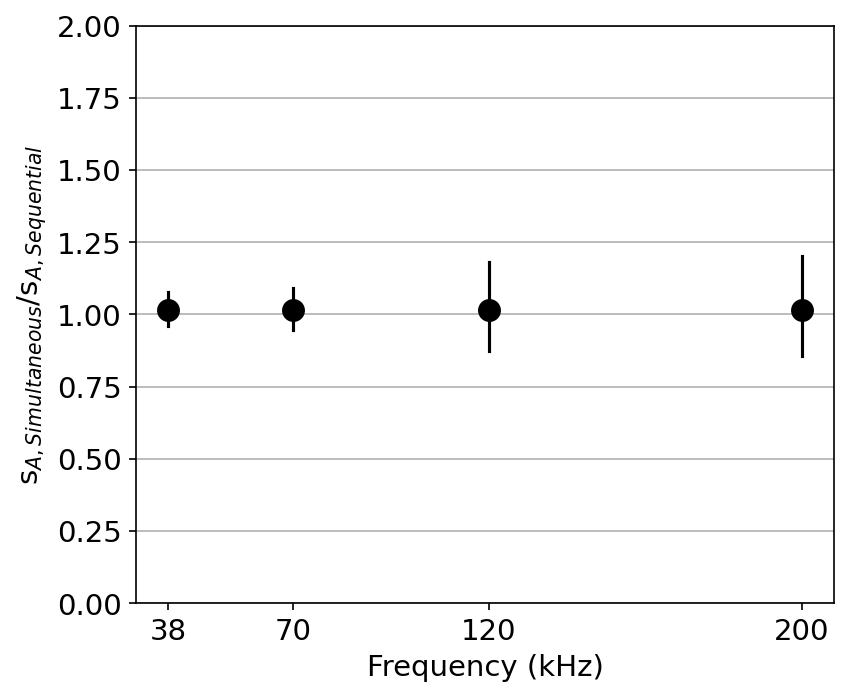

In [426]:
# 15 min 
plt.figure(figsize=(6,5),dpi=150)
plt.rcParams.update({'font.size': 14})
frequencies = [38000,70000,120000,200000]
for f in frequencies:
    plt.plot(f,10**(np.nanmean(np.log10(ratios[(ratios.f==f)].rat_sa))),'.',color='k',markersize=20)
    print(10**np.nanmean(np.log10(ratios[(ratios.f==f)].rat_sa)))
    #plt.plot(fp-10000,np.nanmedian(ratios[(ratios.f==f)&(ratios.calType==cal)].r),'x',color=colors[cal],markersize=20,label='_nolegend_')
    plt.plot([f,f],[np.percentile(ratios[(ratios.f==f)].rat_sa,2.5), np.percentile(ratios[(ratios.f==f)].rat_sa,97.5)],color='k',markersize=20,label='_nolegend_')
#plt.hlines(1,f-12000,f+12000,'k',linestyle='--')
plt.ylim([0,2])
plt.xticks(frequencies,labels = [str(int(f/1000)) for f in frequencies])
plt.grid(axis='y')                                              
plt.ylabel('s$_{A,Simultaneous}$/s$_{A,Sequential}$')
plt.xlabel('Frequency (kHz)')


1.021559647637158
1.0208968344954215
1.0214737063050088
1.0222841433795389


Text(0.5, 0, 'Frequency (kHz)')

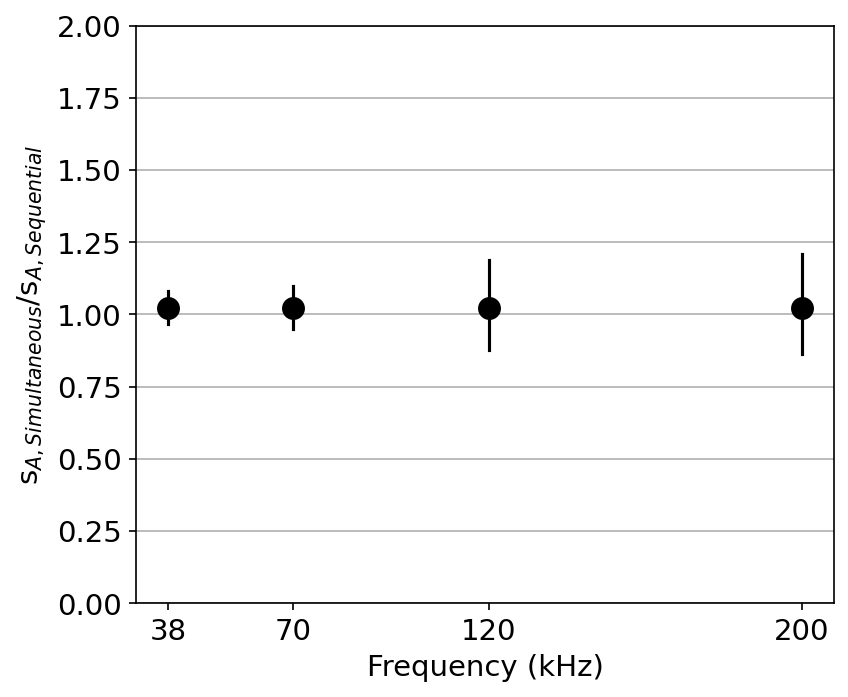

In [423]:
# 15 min 
plt.figure(figsize=(6,5),dpi=150)
plt.rcParams.update({'font.size': 14})
frequencies = [38000,70000,120000,200000]
for f in frequencies:
    plt.plot(f,10**(np.nanmean(np.log10(ratios[(ratios.f==f)].r))),'.',color='k',markersize=20)
    print(10**np.nanmean(np.log10(ratios[(ratios.f==f)].r)))
    #plt.plot(fp-10000,np.nanmedian(ratios[(ratios.f==f)&(ratios.calType==cal)].r),'x',color=colors[cal],markersize=20,label='_nolegend_')
    plt.plot([f,f],[np.percentile(ratios[(ratios.f==f)].r,2.5), np.percentile(ratios[(ratios.f==f)].r,97.5)],color='k',markersize=20,label='_nolegend_')
#plt.hlines(1,f-12000,f+12000,'k',linestyle='--')
plt.ylim([0,2])
plt.xticks(frequencies,labels = [str(int(f/1000)) for f in frequencies])
plt.grid(axis='y')                                              
plt.ylabel('s$_{A,Simultaneous}$/s$_{A,Sequential}$')
plt.xlabel('Frequency (kHz)')


In [1414]:
idx

{7: {'distance': 36.15635027777778,
  'latitude': 47.68512166666666,
  'longitude': 47.68512166666666,
  'timestamp': numpy.datetime64('2024-01-15T03:58:54.608'),
  'file_offset': 70132},
 8: {'distance': 36.159698500000005,
  'latitude': 47.68512166666666,
  'longitude': 47.68512166666666,
  'timestamp': numpy.datetime64('2024-01-15T03:58:55.597'),
  'file_offset': 311852},
 9: {'distance': 36.1630873888889,
  'latitude': 47.68512166666666,
  'longitude': 47.68512166666666,
  'timestamp': numpy.datetime64('2024-01-15T03:58:56.598'),
  'file_offset': 552980},
 10: {'distance': 36.166479666666675,
  'latitude': 47.68512166666666,
  'longitude': 47.68512166666666,
  'timestamp': numpy.datetime64('2024-01-15T03:58:57.598'),
  'file_offset': 794108},
 11: {'distance': 36.16986855555557,
  'latitude': 47.68512166666666,
  'longitude': 47.68512166666666,
  'timestamp': numpy.datetime64('2024-01-15T03:58:58.599'),
  'file_offset': 1035512},
 12: {'distance': 36.17325744444446,
  'latitude': 4

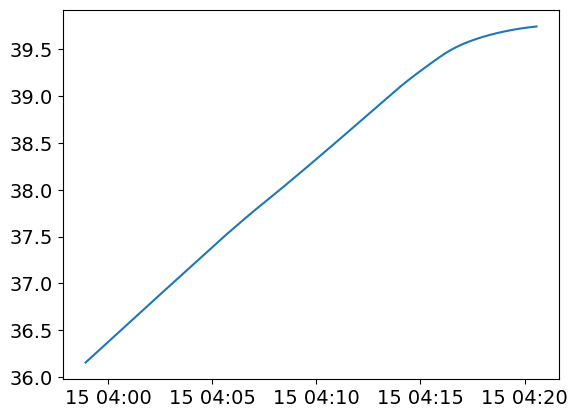

In [1406]:
ek80 = EK80.EK80()
idx = ek80.read_idx('D:/D20240115-T035854.idx')
plt.plot([idx[k]['timestamp'] for k in idx.keys()],[idx[k]['distance'] for k in idx.keys()])